In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
ds = pd.read_csv("./data/LR/Salary_Data.csv")
X = ds["YearsExperience"].values
Y = ds["Salary"].values

In [9]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [10]:
Y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

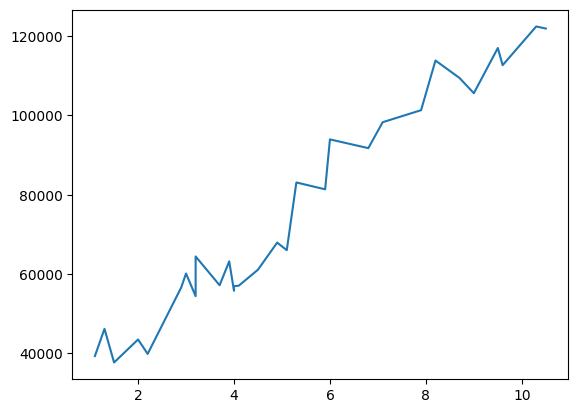

In [11]:
plt.plot(X,Y)

In [14]:
X = np.array(X)
Y = np.array(Y)

In [20]:
def mean(X):
    return np.sum(X)/len(X)

In [21]:
def variance(X):
    mean_val = mean(X)
    return np.sum((X-mean_val)**2)/len(X)

In [22]:
def norm(X):
    mean_val = mean(X)
    variance_val = variance(X)
    return (X-mean_val)/np.sqrt(variance_val)

In [23]:
X_norm = norm(X)
X_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

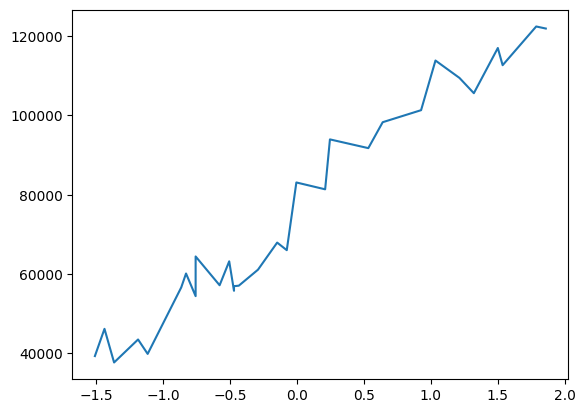

In [25]:
plt.plot(X_norm, Y)

In [26]:
import random

In [32]:
class SimpleLR:
    def __init__(self, lr=0.1, max_iter=2000, threshold=1e-6):
        self.lr = lr
        self.max_iter = max_iter
        self.threshold = threshold
        self.weight = random.uniform(-1,1)
        self.bias = random.uniform(-1,1)
    def predict(self, X):
        return self.weight*X + self.bias
    def fit(self, X, Y):
        n = len(X)
        loss_history = []
        y_pred = self.predict(X)
        errors = Y-y_pred
        prev_loss = np.sum(1/(2*n)) * np.sum(errors**2)
        loss_history.append(prev_loss)
        for i in range(self.max_iter):
            w_grad = (1/n) * np.sum(errors*X)
            b_grad = (1/n) * np.sum(errors)
            self.weight += self.lr * w_grad
            self.bias += self.lr * b_grad
            y_pred = self.predict(X)
            errors = Y-y_pred
            cur_loss = (1/(2*n)) * np.sum(errors**2)
            if np.abs(cur_loss -prev_loss) < self.threshold:
                break
            prev_loss = cur_loss
            loss_history.append(cur_loss)
        return loss_history
    def plot(self, X, Y):
        y_pred = self.predict(X)
        plt.plot(X, Y)
        plt.plot(X, y_pred)

In [33]:
model = SimpleLR()

In [34]:
loss_history = model.fit(X_norm, Y)

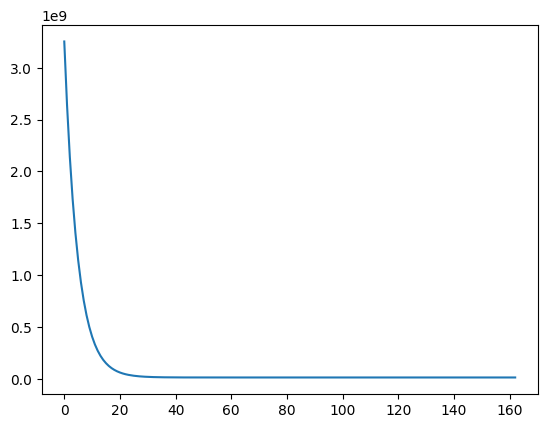

In [35]:
plt.plot(loss_history)

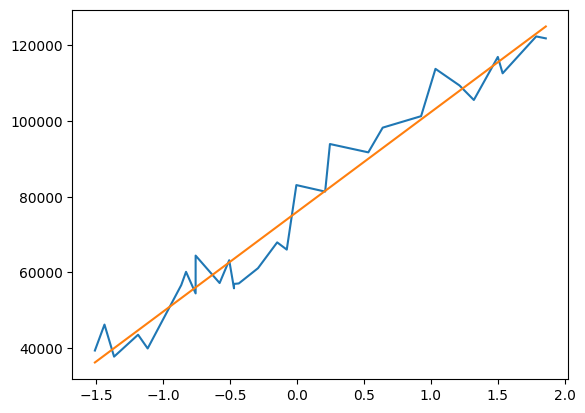

In [36]:
model.plot(X_norm, Y)